# Genre vs Audio Features
---

### Analysis
* Death Metal dominates the most Spotify audio features as per the following table summary. The type of audio features that Death Metal dominates (energy, instrumentalness, liveness), indicates that Death Metal is certainly the most extreme type of music compared to the other genres.
* Hip-hop scores the highest on Danceability, with the scoring distribution of hip-hops tracks significantly higher than the other genres. This could mean that hip-hop tracks are more utilised by dancing studios and clubs.
* Drum and Bass have the highest score of total variance if including the tempo and loudness audio features, whereas Death metal does if excluding the aforementioned audio features. This indicates that these genres have the more varied and diverse type of music. 


### API Authentication

In [2]:
# Dependencies
import requests
from config import client_ID
from config import client_secret
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Setup get requests URL and authentation. 
# This auto-generates an access token using your API Client ID and Client Secret each time you make a request
api_url = "https://api.spotify.com/v1/"
search_url = api_url + "search"

def authenticate_spotify_client(client_ID, client_secret):
    auth_url = "https://accounts.spotify.com/api/token"
    auth_response = requests.post(auth_url, {
        'grant_type': 'client_credentials',
        'client_id': client_ID,
        'client_secret': client_secret,
      })
    auth_response_data = auth_response.json()
    access_token = auth_response_data['access_token']
    return access_token

access_token = authenticate_spotify_client(client_ID, client_secret)

In [4]:
# Define an input to generate playlist track data
def search_playlist(playlist_id):
    playlist_api = "https://api.spotify.com/v1/playlists/"
    playlist_url = playlist_api + playlist_id +f"/tracks"
    headers = {
        'Authorization': 'Bearer {token}'.format(token=access_token)
    }
    params = {
        'market': 'AU'
    }
    response = requests.get(playlist_url, headers=headers, params=params)
    data = response.json()
    return data["items"]

In [5]:
# Define an input to generate track audio features
def search_track(track_id):
    track_api = "https://api.spotify.com/v1/audio-features/"
    track_url = track_api + track_id
    headers = {
        'Authorization': 'Bearer {token}'.format(token=access_token)
    }
    response = requests.get(track_url, headers=headers)
    data = response.json()
    return data

In [6]:
# Save a dictionary of playlist ID to call from Spotify API
playlist_id_data = {
    "rock": "37i9dQZF1EQpj7X7UK8OOF", 
    "drum_and_bass": "37i9dQZF1EIherXksVvnrN", 
    "death_metal": "37i9dQZF1EIf78r65WuXwA", 
    "hip-hop": "37i9dQZF1EQnqst5TRi17F", 
    "country": "37i9dQZF1EQmPV0vrce2QZ", 
    "pop": "37i9dQZF1EQncLwOalG3K7"
}

# Create empty list to fill with Spotify IDs to be called
audio_analysis_summary = {"Genre": [], 
                          "Playlist_ID": [], 
                          "Track_ID": []}

### Genre Means and Distribution

In [7]:
# Get the track ID for each song in each playlist using a for loop
for playlist_id in playlist_id_data:

    # Getting playlist data for each playlist ID
    playlist = search_playlist(playlist_id_data[playlist_id])

    # Counter to iterate through playlist data list
    n = 0
    
    # Go through all tracks and save the track ID to the list
    for i in playlist:
        audio_analysis_summary["Track_ID"].append(playlist[n]["track"]["id"])
        audio_analysis_summary["Genre"].append(playlist_id)
        audio_analysis_summary["Playlist_ID"].append(playlist_id_data[playlist_id])
        n = n + 1

In [33]:
# Convert to dataframe
audio_analysis_summary = pd.DataFrame(audio_analysis_summary)

In [9]:
# Create a variable to get audio features for each track ID  from the Spotify API
track_ID = audio_analysis_summary["Track_ID"]

# Create empty list for audio features data
track_audio_analysis = {"Track_ID": [],
                        "danceability": [],
                        "energy": [],
                        "loudness": [],
                        "acousticness": [],
                        "instrumentalness": [],
                        "liveness": [],
                        "valence": [],
                        "tempo": []
                       }

# Save audio features to the list
for track in track_ID:
    track_audio_data = search_track(track)
    track_audio_analysis["Track_ID"].append(track)
    track_audio_analysis["danceability"].append(track_audio_data["danceability"])
    track_audio_analysis["energy"].append(track_audio_data["energy"])
    track_audio_analysis["loudness"].append(track_audio_data["loudness"])
    track_audio_analysis["acousticness"].append(track_audio_data["acousticness"])
    track_audio_analysis["instrumentalness"].append(track_audio_data["instrumentalness"])
    track_audio_analysis["liveness"].append(track_audio_data["liveness"])
    track_audio_analysis["valence"].append(track_audio_data["valence"])
    track_audio_analysis["tempo"].append(track_audio_data["tempo"])

In [39]:
# Convert to dataframe
track_audio_analysis = pd.DataFrame(track_audio_analysis)

# Merge the data frames
track_analysis = pd.merge(audio_analysis_summary, track_audio_analysis, how="left", on=["Track_ID","Track_ID"])
track_analysis.head(3)

Genre             Playlist_ID                Track_ID  danceability  energy  \
0  rock  37i9dQZF1EQpj7X7UK8OOF  4BP3uh0hFLFRb5cjsgLqDh         0.640   0.663   
1  rock  37i9dQZF1EQpj7X7UK8OOF  1JSTJqkT5qHq8MDJnJbRE1         0.820   0.452   
2  rock  37i9dQZF1EQpj7X7UK8OOF  60a0Rd6pjrkxjPbaKzXjfq         0.556   0.864   

   loudness  acousticness  instrumentalness  liveness  valence    tempo  
0    -7.516       0.20100           0.00806    0.1520    0.663  132.770  
1    -9.796       0.54300           0.00294    0.0714    0.740  117.401  
2    -5.870       0.00958           0.00000    0.2090    0.400  105.143

In [40]:
# Average value for tracks of each genre
audio_mean = pd.DataFrame({"Danceability": track_analysis.groupby(["Genre"])["danceability"].mean(),
                           "Energy": track_analysis.groupby(["Genre"])["energy"].mean(),
                           "Loudness": track_analysis.groupby(["Genre"])["loudness"].mean(),
                           "Acousticness": track_analysis.groupby(["Genre"])["acousticness"].mean(),
                           "Instrumentalness": track_analysis.groupby(["Genre"])["instrumentalness"].mean(),
                           "Liveness": track_analysis.groupby(["Genre"])["liveness"].mean(),
                           "Valence": track_analysis.groupby(["Genre"])["valence"].mean(),
                           "Tempo": track_analysis.groupby(["Genre"])["tempo"].mean()
                          })

audio_mean.head(3)

Danceability   Energy  Loudness  Acousticness  \
Genre                                                          
country             0.56784  0.57468  -7.28798      0.351710   
death_metal         0.35016  0.93722  -5.76456      0.000344   
drum_and_bass       0.55230  0.87058  -3.14776      0.049614   

               Instrumentalness  Liveness   Valence      Tempo  
Genre                                                           
country                0.001955  0.146506  0.474560  119.95554  
death_metal            0.413084  0.228660  0.268878  118.39464  
drum_and_bass          0.098785  0.215868  0.336012  139.86554

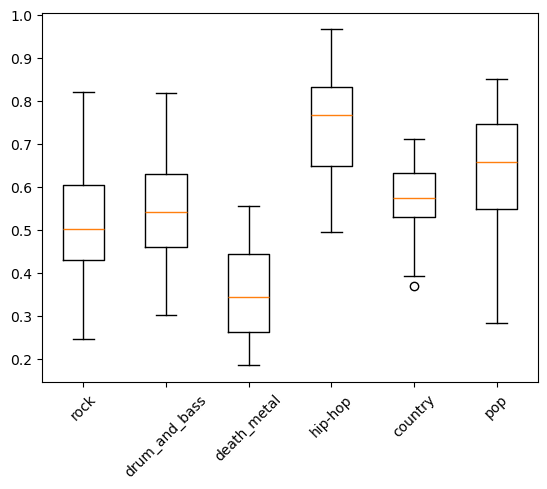

In [12]:
# Find the distribution of the danceability audio feature for each genre

# Create a list of each genre
genre_ID = {"rock":[], 
            "drum_and_bass": [], 
            "death_metal": [],
            "hip-hop": [],
            "country": [], 
            "pop": []
}

# Iterate through all of the tracks and add to the list
for genre in genre_ID:
    mask = track_analysis.loc[track_analysis["Genre"] == genre]
    dance = mask["danceability"].tolist()
    genre_ID[genre] = dance

# Plot on a boxplot
labels, data = [*zip(*genre_ID.items())] 
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45)
plt.show()

### Variance

In [41]:
# Calculating variance of 
genre_variance_data = pd.DataFrame({"Danceability": track_analysis.groupby(["Genre"])["danceability"].var(),
                           "Energy": track_analysis.groupby(["Genre"])["energy"].var(),
                           "Loudness": track_analysis.groupby(["Genre"])["loudness"].var(),
                           "Acousticness": track_analysis.groupby(["Genre"])["acousticness"].var(),
                           "Instrumentalness": track_analysis.groupby(["Genre"])["instrumentalness"].var(),
                           "Liveness": track_analysis.groupby(["Genre"])["liveness"].var(),
                           "Valence": track_analysis.groupby(["Genre"])["valence"].var(),
                           "Tempo": track_analysis.groupby(["Genre"])["tempo"].var()
                          })

genre_variance_data.head(3)

Danceability    Energy  Loudness  Acousticness  \
Genre                                                           
country            0.006855  0.040638  6.543827  6.653024e-02   
death_metal        0.009741  0.005576  7.919430  7.726111e-07   
drum_and_bass      0.015273  0.009694  3.717555  5.828304e-03   

               Instrumentalness  Liveness   Valence        Tempo  
Genre                                                             
country                0.000065  0.010584  0.041868  1068.534625  
death_metal            0.139183  0.025490  0.023897   540.469719  
drum_and_bass          0.040286  0.027252  0.042405  1833.118435

In [14]:
# creating a dictonary with total variance
genre_variance1 = {"country": "", 
            "death_metal": "", 
            "drum_and_bass": "",
            "hip-hop": "",
            "pop": "", 
            "rock": ""
}

# reseting the index so that genre becomes a normal column
genre_reset = genre_variance_data.reset_index()

#columsn to iterate through
columns1 = ['Danceability',
           'Energy',
           'Loudness',
           'Acousticness',
           'Instrumentalness',
           'Liveness',
           'Valence',
           'Tempo']

# Calculate total variance for each genre. Note that Var(X + Y) = Var(X) + Var(Y)
n = 0
total = 0
for genre in genre_variance1:
    mask = genre_reset.loc[genre_reset["Genre"] == genre]
    for column in columns1:
        total = total + mask[column][n]
        genre_variance1[genre] = total
    total = 0
    n = n + 1

# create a new dataframe
genre_variance1 = pd.DataFrame(genre_variance1.items(),columns=["Genre", "Total Var. Incl. Loudness and Tempo"])

# assign a rank to the new variance summary
genre_variance1["Rank Incl. Loudness and Tempo"] = genre_variance1.sort_values(by=["Total Var. Incl. Loudness and Tempo"], ascending=False) \
               .reset_index() \
               .sort_values("index") \
               .index + 1

In [15]:
# The loudness and tempo audio features skews the data as this data is based on dP and BPM, whereas the others are on a lienar scale of 0.00 to 1.00. 
# Therefore we will compare the previous data with new data that removes this column.
# creating a dictonary with total variance
genre_variance2 = {"country": "", 
            "death_metal": "", 
            "drum_and_bass": "",
            "hip-hop": "",
            "pop": "", 
            "rock": ""
}

# columns that exclude tempo and loudness
columns2 = ['Danceability',
           'Energy',
           'Acousticness',
           'Instrumentalness',
           'Liveness',
           'Valence']

# Calculate total variance for each genre. Note that Var(X + Y) = Var(X) + Var(Y)
n = 0
total = 0
for genre in genre_variance2:
    mask = genre_reset.loc[genre_reset["Genre"] == genre]
    for column in columns2:
        total = total + mask[column][n]
        genre_variance2[genre] = total
    total = 0
    n = n + 1

# create a new dataframe
genre_variance2 = pd.DataFrame(genre_variance2.items(),columns=["Genre", "Total Var. Excl. Loudness and Tempo"])

# assign a rank to the new variance summary
genre_variance2["Rank Excl. Loudness and Tempo"] = genre_variance2.sort_values(by=["Total Var. Excl. Loudness and Tempo"], ascending=False) \
               .reset_index() \
               .sort_values("index") \
               .index + 1

In [16]:
# Merge both variance dataframes
merge_variance = pd.merge(genre_variance1, genre_variance2, how="left", on=["Genre","Genre"])

merge_variance

Genre  Total Var. Incl. Loudness and Tempo  \
0        country                          1075.244994   
1    death_metal                           548.593037   
2  drum_and_bass                          1836.976728   
3        hip-hop                          1069.295923   
4            pop                           507.444116   
5           rock                           790.422618   

   Rank Incl. Loudness and Tempo  Total Var. Excl. Loudness and Tempo  \
0                              2                             0.166542   
1                              5                             0.203888   
2                              1                             0.140738   
3                              3                             0.155203   
4                              6                             0.119054   
5                              4                             0.127796   

   Rank Excl. Loudness and Tempo  
0                              2  
1                              1  
2                              4  
3                              3  
4                              6  
5                              5

<function matplotlib.pyplot.show(close=None, block=None)>

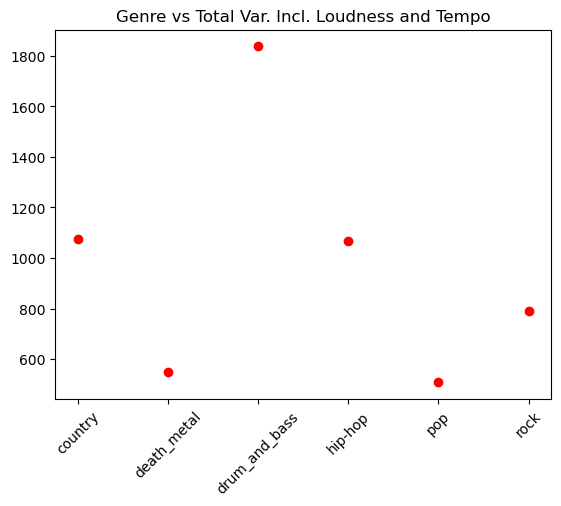

In [30]:
plt.scatter(merge_variance["Genre"], merge_variance["Total Var. Incl. Loudness and Tempo"], color="r", label="Total Var. Incl. Loudness and Tempo") 
plt.xticks(rotation=45)
plt.title("Genre vs Total Var. Incl. Loudness and Tempo")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

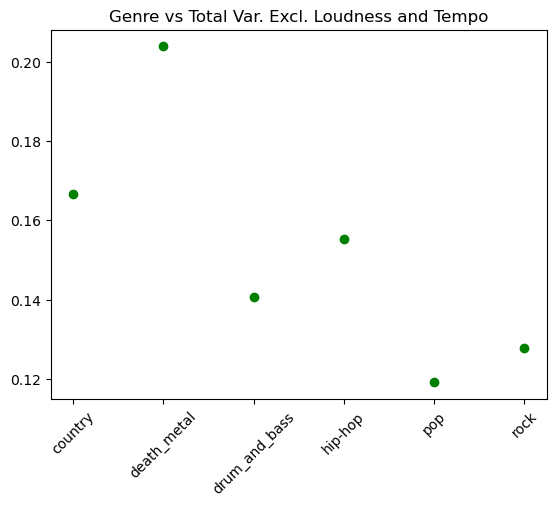

In [31]:
plt.scatter(merge_variance["Genre"], merge_variance["Total Var. Excl. Loudness and Tempo"], color="g", label="Total Var. Excl. Loudness and Tempo")
plt.xticks(rotation=45)
plt.title("Genre vs Total Var. Excl. Loudness and Tempo")
plt.show